In [5]:
import numpy as np
import pandas as pd
import sqlite3
import re
import matplotlib.pyplot as plt
import random
from faker import Faker
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

<h1 style="text-align:center;">Airline Booking Data Pipeline and Analysis
 </h1>
<hr>

<a name="top"></a>
#### Table of Contents:

[ref0]: #dat_prep
- [Data Preprocessing][ref0]

[ref1]: #first
- [Data Exploration][ref1]

[ref2]: #second
- [Entity Relationship Diagram (ERD)][ref2]

[ref3]: #third
- [Creating rules with regex][ref3]

[ref4]: #fourth
- [Converting Different Type of Data to String][ref4]
   
[ref5]: #fifth
- [Create random synthetic data for flights and bookings table][ref5]
   
[ref6]: #sixth
- [Ingest to an sqlite3 database][ref6]
   

   


***

<a name="dat_prep"></a>
# Data Preprocessing
This section shows the preparation of the dataset before using for exploration and analysis
***


In [9]:
#!pip install faker

In [10]:
df = pd.read_csv('customer_booking.csv', encoding='latin1')

In [11]:
Faker.seed(163)
fake = Faker()

In [12]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [13]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [14]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool>

### Data Dictionary



| Variable              | Description                                                | Data Type          | Example Value  |
|-----------------------|------------------------------------------------------------|--------------------|----------------|
| num_passengers        | Number of passengers per booking                           | Integer            | 2              |
| sales_channel         | Sales channel booking was made on                          | String        | Internet       |
| trip_type             | Trip Type (Round Trip, One Way, Circle Trip)               | String        | RoundTrip      |
| purchase_lead         | The number of days between the booking date and travel date| Integer            | 262            |
| length_of_stay        | The number of days spent at destination                    | Integer            | 19             |
| flight_hour           | Hour of flight departure                                   | Integer            | 7              |
| flight_day            | Day of week of flight departure                            | String        | Sat            |
| route                 | Origin to destination flight route                         | String        | AKLDEL         |
| booking_origin        | Country from where booking was made                        | String        | New Zealand    |
| wants_extra_baggage   | If the customer wanted extra baggage in the booking        | Boolean            | 1              |
| wants_preferred_seat  | If the customer wanted a preferred seat in the booking     | Boolean            | 0              |
| wants_in_flight_meals | If the customer wanted in-flight meals in the booking      | Boolean            | 0              |
| flight_duration       | Total duration of flight (in hours)                        | Float    | 5.52           |
| booking_complete      | Flag indicating if the customer completed the booking      | Boolean            | 0              |



[ref]: #top
[Back to Table of Contents][ref]

<a name="first"></a>
# Data Exploration
This section graphs the variable in the dataset
***


### Number of Passengers per Booking

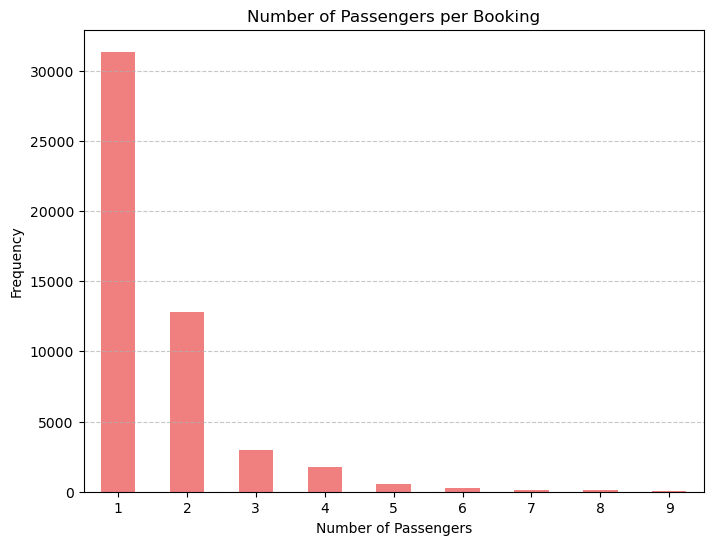

In [15]:
plt.figure(figsize=(8, 6))
df['num_passengers'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Number of Passengers per Booking')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Flight Hour Distribution


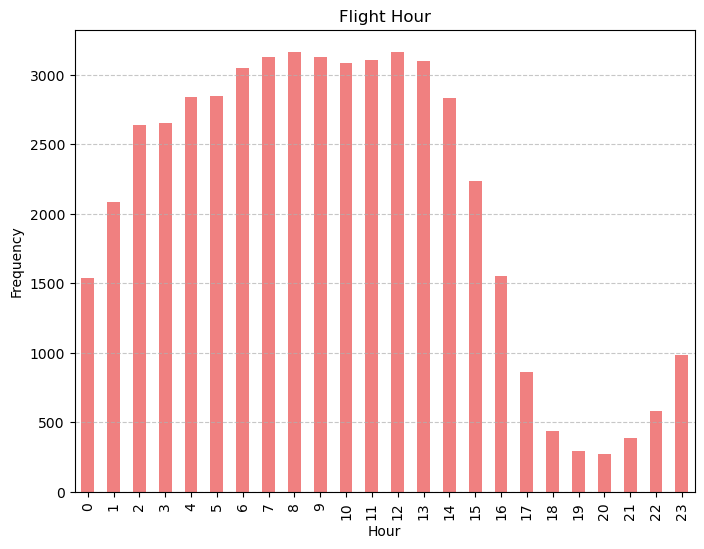

In [16]:
plt.figure(figsize=(8, 6))
df['flight_hour'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Flight Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Wants Extra Baggage Distribution

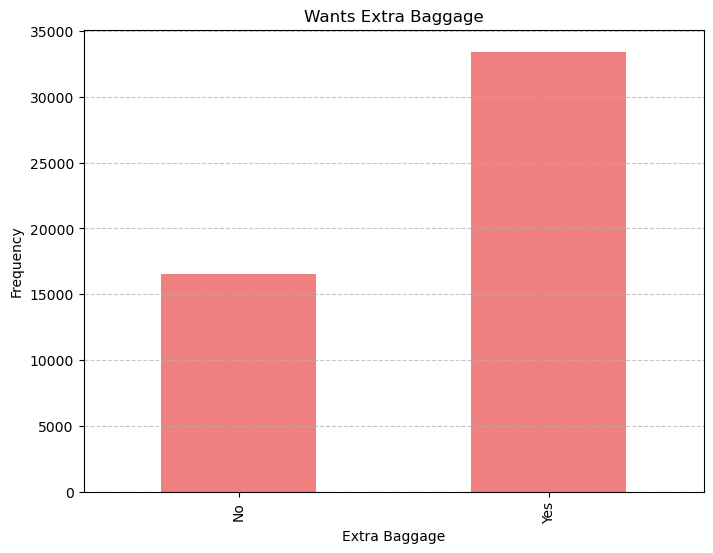

In [17]:
plt.figure(figsize=(8, 6))
df['wants_extra_baggage'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Wants Extra Baggage')
plt.xlabel('Extra Baggage')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Sales Channel Distribution

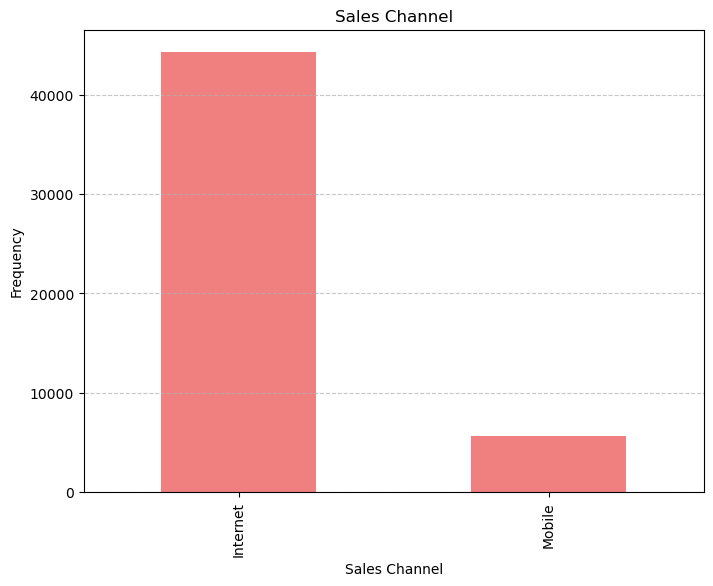

In [18]:
plt.figure(figsize=(8, 6))
df['sales_channel'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Trip Type Distribution

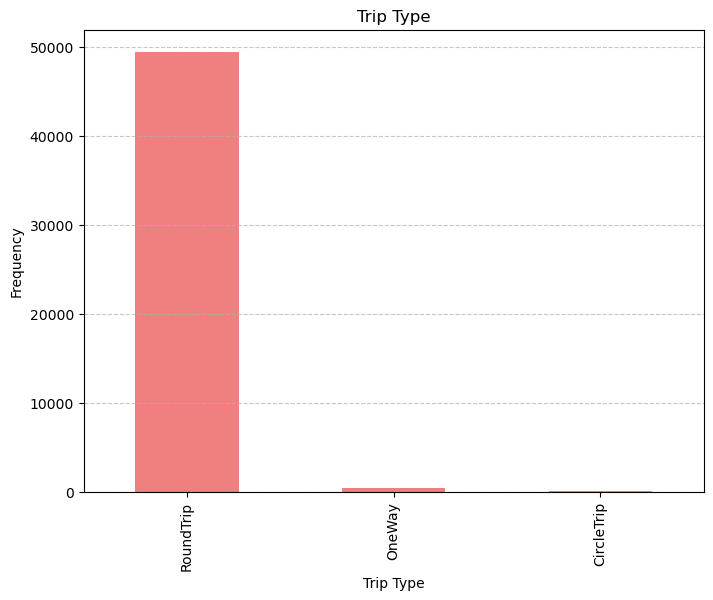

In [19]:
plt.figure(figsize=(8, 6))
df['trip_type'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Flight Day Distribution

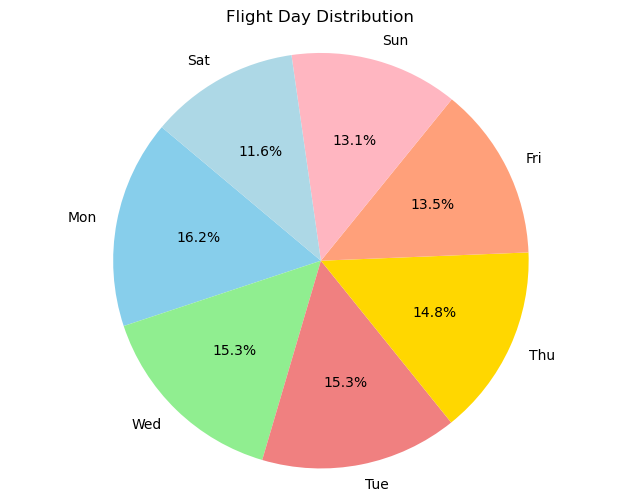

In [20]:
flight_day_counts = df['flight_day'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(flight_day_counts, 
        labels=flight_day_counts.index, 
        autopct='%1.1f%%',
        startangle=140, 
        colors=['skyblue', 'lightgreen', 'lightcoral',
                'gold', 'lightsalmon', 'lightpink', 'lightblue'])

plt.title('Flight Day Distribution')
plt.axis('equal')  
plt.show()

[ref]: #top
[Back to Table of Contents][ref]

<a name="second"></a>
# Entity Relationship Diagram (ERD)
This section shows the tables that was created for this project
***


 **Booking to Flight**: This is a ***many-to-one relationship*** meaning multiple bookings can correspond to the same flight. 

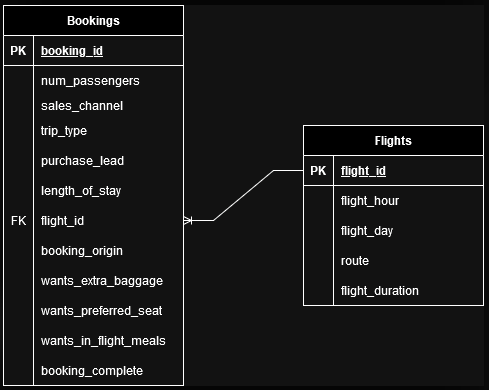

[ref]: #top
[Back to Table of Contents][ref]

<a name="Third"></a>
#  Creating rules with regex
This section shows how we created the regex rules for the variables
***



In [21]:
regex_patterns = {
    "booking_id": r"^(0|[1-9]\d*)$",
    "flight_id": r"^(0|[1-9]\d*)$",
    "num_passengers": r"^[1-9]$",
    "purchase_lead": r"^[1-9]$",
    "length_of_stay": r"^[1-9]$",
    "sales_channel": r"^(INTERNET|MOBILE)$",
    "trip_type": r"^(OneWay|RoundTrip|CircleTrip)$",
    "flight_hour": r"^([0-9]|1[0-9]|2[0-3])$",
    "flight_day": r"^(Mon|Tue|Wed|Thu|Fri|Sat|Sun)$",
    "route": r"^[A-Z]{6}$",
    "booking_origin": r"^[A-Z]{2}$",
    "wants_extra_baggage": r"^[01]$",
    "wants_preferred_seat": r"^[01]$",
    "wants_in_flight_meals": r"^[01]$",
    "booking_complete": r"^[01]$",
    "flight_duration":r"^\d+(\.\d{1,2})?$"
}


In [22]:
example_data = {
    "booking_id": "123456",
    "flight_id": "0",
    "num_passengers": "3",
    "purchase_lead": "5",
    "length_of_stay": "7",
    "sales_channel": "MOBILE",
    "trip_type": "RoundTrip",
    "flight_hour": "21",
    "flight_day": "Fri",
    "route": "JFKLAX",
    "booking_origin": "US",
    "wants_extra_baggage": "1",
    "wants_preferred_seat": "0",
    "wants_in_flight_meals": "1",
    "booking_complete": "1",
    "flight_duration":"5.52"
}


def validate_data(data, patterns):
    validation_results = {}
    for key, value in data.items():
        if re.match(patterns[key], value):
            validation_results[key] = True
        else:
            validation_results[key] = False
    return validation_results


validate_data(example_data, regex_patterns)

{'booking_id': True,
 'flight_id': True,
 'num_passengers': True,
 'purchase_lead': True,
 'length_of_stay': True,
 'sales_channel': True,
 'trip_type': True,
 'flight_hour': True,
 'flight_day': True,
 'route': True,
 'booking_origin': True,
 'wants_extra_baggage': True,
 'wants_preferred_seat': True,
 'wants_in_flight_meals': True,
 'booking_complete': True,
 'flight_duration': True}

[ref]: #top
[Back to Table of Contents][ref]

<a name="fourth"></a>
# Converting Different Type of Data to String
This section shows the convertion of each data type into string and then the application of regex rules.
***

In [23]:
def validate_data_with_conversion(data, patterns):
    validation_results = {}
    for key, value in data.items():
        value_str = str(value)  # Convert value to string
        if re.match(patterns[key], value_str):
            validation_results[key] = True
        else:
            validation_results[key] = False
    return validation_results

# Example data with various types (integer, float, and string)
example_data_mixed_types = {
    "booking_id": 123456,  # Integer
    "flight_id": "0",  # String
    "num_passengers": 3,  # Integer
    "purchase_lead": 5,  # Integer
    "length_of_stay": 7,  # Integer
    "sales_channel": "MOBILE",  # String
    "trip_type": "RoundTrip",  # String
    "flight_hour": 21,  # Integer
    "flight_day": "Fri",  # String
    "route": "JFKLAX",  # String
    "booking_origin": "US",  # String
    "wants_extra_baggage": 1,  # Integer
    "wants_preferred_seat": 0,  # Integer
    "wants_in_flight_meals": 1,  # Integer
    "booking_complete": 1,  # Integer
    "flight_duration": 5.52 #String
}

validate_data_with_conversion(example_data_mixed_types, regex_patterns)


{'booking_id': True,
 'flight_id': True,
 'num_passengers': True,
 'purchase_lead': True,
 'length_of_stay': True,
 'sales_channel': True,
 'trip_type': True,
 'flight_hour': True,
 'flight_day': True,
 'route': True,
 'booking_origin': True,
 'wants_extra_baggage': True,
 'wants_preferred_seat': True,
 'wants_in_flight_meals': True,
 'booking_complete': True,
 'flight_duration': True}

[ref]: #top
[Back to Table of Contents][ref]

<a name="fifth"></a>
# Create random synthetic data for flights and bookings table
This section shows the created random synthetic data for the flight and booking table
***

### Flight

In [24]:
flight_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

def generate_flights_data():
    flights_data = {
        'flight_id': [fake.uuid4() for _ in range(100)],
        'flight_hour': [fake.random_int(min=0, max=23) for _ in range(100)],
        'flight_day': [fake.random_element(elements=flight_days) for _ in range(100)],
        'route': [fake.bothify(text='???-???') for _ in range(100)],  # Random route in AAA-BBB format
        'flight_duration': [f"{fake.random_int(min=1, max=12)}:{fake.random_int(min=0, max=59):02d}" for _ in range(100)]
    }
    return pd.DataFrame(flights_data)

flights = generate_flights_data()
flights.head()

,flight_id,flight_hour,flight_day,route,flight_duration
0,e8659de2-7504-4ee2-9f0a-fd608a9a8bc2,2,Wed,eAr-UWO,6:32
1,dd26ccd7-7e22-4912-ac43-201f9595f31b,2,Thu,JdI-wam,9:19
2,377e6f3a-48e7-4ecb-8a23-1d4ae5abe120,0,Wed,dcy-LRb,12:10
3,d4ba1fbc-5d02-4404-b49b-e2265a38427a,9,Sat,GRH-vpg,1:10
4,9c115b25-2d64-4627-a422-93f423326b71,13,Wed,khr-ZZC,9:03


### Booking

In [25]:
def generate_bookings_data(flight_ids):
    sales_channels = ['INTERNET', 'MOBILE']
    trip_types = ['OneWay', 'RoundTrip', 'CircleTrip']
    
    bookings_data = {
        'booking_id': [fake.uuid4() for _ in range(100)],
        'num_passengers': [fake.random_int(min=1, max=9) for _ in range(100)],
        'sales_channel': [fake.random_element(elements=sales_channels) for _ in range(100)],
        'trip_type': [fake.random_element(elements=trip_types) for _ in range(100)],
        'purchase_lead': [fake.random_int(min=1, max=30) for _ in range(100)],
        'length_of_stay': [fake.random_int(min=1, max=15) for _ in range(100)],
        'flight_id': [fake.random_element(elements=flight_ids) for _ in range(100)],
        'booking_origin': [fake.country_code() for _ in range(100)],
        'wants_extra_baggage': [fake.random_digit() % 2 for _ in range(100)],
        'wants_preferred_seat': [fake.random_digit() % 2 for _ in range(100)],
        'wants_in_flight_meals': [fake.random_digit() % 2 for _ in range(100)],
        'booking_complete': [fake.random_digit() % 2 for _ in range(100)]
    }
    return pd.DataFrame(bookings_data)

flight_ids = flights['flight_id'].tolist()

bookings = generate_bookings_data(flight_ids)
bookings.head()


,booking_id,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_id,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,c4bbed16-3507-497a-9893-981a43e6351f,9,MOBILE,RoundTrip,16,15,bc282048-8110-4e2c-b073-084cc52ce3f7,NR,0,0,0,1
1,46cb73bd-b0b4-4aa5-a67c-2e1891048594,5,MOBILE,OneWay,3,8,77f2528f-d51b-4548-9f86-14b2bd35ceb5,GM,1,1,1,1
2,4fb1df7e-0c15-4656-a2da-ccc81e371d64,6,INTERNET,CircleTrip,1,6,95d5e5a6-eecb-4c95-a2ad-8aaf460474ec,SA,0,0,0,0
3,9af74d54-86de-43c8-be37-a0bb3de28dbe,5,INTERNET,RoundTrip,23,5,d1cfab54-d82e-4779-b1b6-9e4467217923,KW,0,0,1,0
4,6717fce5-0464-4304-9136-206eb7fd1da9,9,INTERNET,RoundTrip,9,9,8a8f42e7-aca9-4c88-ba7c-6420b162ddb2,FM,1,1,1,1


In [26]:
dataframes = [bookings, flights]

for df in dataframes:
    print(df.head())

                             booking_id  num_passengers sales_channel  \
0  c4bbed16-3507-497a-9893-981a43e6351f               9        MOBILE   
1  46cb73bd-b0b4-4aa5-a67c-2e1891048594               5        MOBILE   
2  4fb1df7e-0c15-4656-a2da-ccc81e371d64               6      INTERNET   
3  9af74d54-86de-43c8-be37-a0bb3de28dbe               5      INTERNET   
4  6717fce5-0464-4304-9136-206eb7fd1da9               9      INTERNET   

    trip_type  purchase_lead  length_of_stay  \
0   RoundTrip             16              15   
1      OneWay              3               8   
2  CircleTrip              1               6   
3   RoundTrip             23               5   
4   RoundTrip              9               9   

                              flight_id booking_origin  wants_extra_baggage  \
0  bc282048-8110-4e2c-b073-084cc52ce3f7             NR                    0   
1  77f2528f-d51b-4548-9f86-14b2bd35ceb5             GM                    1   
2  95d5e5a6-eecb-4c95-a2ad-8aaf4604

[ref]: #top
[Back to Table of Contents][ref]

<a name="sixth"></a>
# Ingest to an sqlite3 database
This section shows how we ingest the database to an sqlite3 database.
***

In [27]:
conn = sqlite3.connect('Airline.db')
cursor = conn.cursor()

In [28]:
flights.to_sql('flights', conn, if_exists='replace', index=False)
bookings.to_sql('bookings', conn, if_exists='replace', index=False)

100

In [29]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
for table in tables:
    print(f"Table: {table[0]}")
    cursor.execute(f"PRAGMA table_info({table[0]});")
    columns = cursor.fetchall()
    for column in columns:
        print(f"Column: {column[1]}")


Table: flights
Column: flight_id
Column: flight_hour
Column: flight_day
Column: route
Column: flight_duration
Table: bookings
Column: booking_id
Column: num_passengers
Column: sales_channel
Column: trip_type
Column: purchase_lead
Column: length_of_stay
Column: flight_id
Column: booking_origin
Column: wants_extra_baggage
Column: wants_preferred_seat
Column: wants_in_flight_meals
Column: booking_complete


In [30]:
tables = cursor.fetchall()
for table in tables:
    table_name = table[0]
    print(f"Table: {table_name}")
    
    cursor.execute(f"PRAGMA_table_info('{table_name}')")
    columns = cursor.fetchall()
    
    for column in columns:
        print(f"Column: {column[1]} | Type: {column[2]}") 

[ref]: #top
[Back to Table of Contents][ref]